In [1]:
import os

In [2]:
import sys
sys.path.append('/app')

In [10]:
from pathlib import Path
import cv2
import numpy as np
import pandas as pd
import pytest
from omegaconf import OmegaConf
from PIL import Image
import http
import matplotlib.pylab as plt
from app import create_appp

In [11]:
def imread(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    return img

def imshow(image, label=None, figsize=(8,8), cmap='gray', **kwargs):
    plt.figure(figsize=figsize)
    if label:
        print(label)
    plt.imshow(image, **kwargs, cmap=cmap)
    plt.show()

In [12]:
folder_images = '../tests/test_data'
paths = Path(folder_images).glob('*.jpg')
images = [imread(str(p)) for p in paths]

In [13]:
def image_in_byte(image):
    Image.fromarray(image)
    flag, image_encoded = cv2.imencode('.png', image)
    return image_encoded.tobytes()

In [14]:
def get_client():
    app = create_app()
    return app.test_client()

In [15]:
def predict(client, img):
    rv = client.post('/predict', data=image_in_byte(img))
    assert rv.status_code == http.HTTPStatus.OK
    return rv.data.decode("utf-8") 

In [16]:
client = get_client()

In [17]:
img = images[0]

In [ ]:
for i, img in enumerate(images):
    cv2.imwrite('../../app/tests/test_data/')

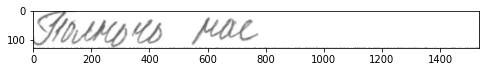

In [18]:
imshow(img)

In [19]:
predict(client, img)

'Полночь нас'